This is where I am planning the ananlysis of the Science Library data set. I'll make a mark-down comment block with each of my questions/hypotheses and then we will find the answers and graph the results. This analysis will be focused on the statistics of the books in the collection. 

In [23]:
##all my imports are up here
import pandas as pd 
import matplotlib.pyplot as plt
import string

#open file
file_name="Sciences_Library.xlsx"
data=pd.read_excel(file_name)

#list columns for easy reference
print(data.columns.tolist())

['Title Control Number', 'Catalog Key', 'Call Sequence', 'Copy Number', 'Format', 'Pub Year', 'BLvl', 'Type', 'Bib Form', 'Type/Form', 'Language', 'MARC key', 'Author', 'Title', 'Library', 'Call Number', 'Shelving Key', 'Class code (LC, SUDOC, NLM)', 'Call Number Range Key', 'Item Created Date', 'Item ID', 'Item Type', 'Home Location', 'Current Location', 'Item Category 1', 'Item Category 2', 'Cataloging department code', 'Cataloging Staff Code', 'Cataloging date code', 'Place of Publication (260a)', 'Publisher (260b)', 'Date of Publication (260c)', 'ISSN', 'ISBN', 'GMD (245h)', 'OCLC', 'Title Created Date', 'Title Cataloged Date', 'Created By', 'Pagination (300a)', 'Illustrations (300b)', 'Size (300c)', 'Total Charges', 'In-House Charges', 'Date Last Charged', 'Last Activity Date']


How many books are in the collection? 

In [15]:
#count all the unique title control numbers
unique_books_count = data['Title Control Number'].nunique()
print(f"Number of unique books: {unique_books_count}")

Number of unique books: 25790


show a pie chart of different languages of the books in the collection (50% english, 20%french, etc...)

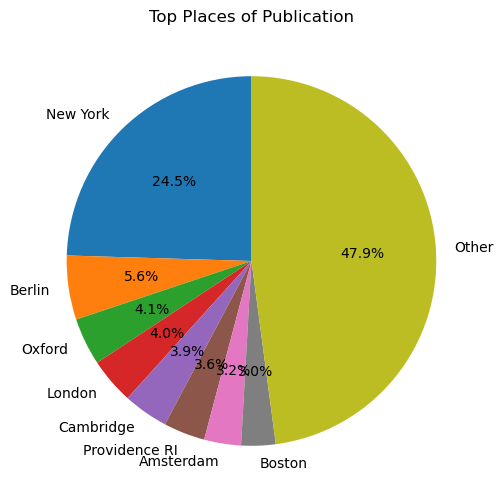

In [27]:
#use Place of Publication (260a)
#group by 'Place of Publication (260a)' and count occurrences

# Clean 'Place of Publication (260a)' column by stripping whitespace and punctuation
#I learned I needed this because my code did not work without it!
data['Place of Publication (260a)'] = data['Place of Publication (260a)'].str.strip()
data['Place of Publication (260a)'] = data['Place of Publication (260a)'].str.translate(str.maketrans('', '', string.punctuation))

# Filter out rows with missing, empty, or invalid 'Place of Publication (260a)'
#I learned I needed this because my code did not work without it!
filtered_data = data[data['Place of Publication (260a)'].notna()]
filtered_data = filtered_data[filtered_data['Place of Publication (260a)'] != '']

# Group by 'Place of Publication (260a)' and count occurrences
publication_counts = filtered_data['Place of Publication (260a)'].value_counts()

# Get the top 8 most common publication places
top_8 = publication_counts.head(8)

# Sum the rest as "Other"
other_count = publication_counts.iloc[8:].sum()

# Create a new Series for the pie chart using pd.concat
pie_data = pd.concat([top_8, pd.Series({'Other': other_count})])

# Plot the pie chart
plt.figure(figsize=(8, 6))
pie_data.plot.pie(autopct='%1.1f%%', startangle=90, legend=False)
plt.title('Top Places of Publication')
plt.ylabel('')  #we don't need this
plt.show()



What authors appear most often in the colelction? List the top 5

In [32]:
#This time I have learned my lesson and will start by stripping whitespace and punctuation and then converting everything to upper case
#We don't want to miss any instances of the same Author

#remove blank spaces or NA values
data = data[data['Author'].notna()]  # Remove NaN values
data = data[data['Author'].str.strip() != '']  # Remove blank entries

# Clean non-empty'Author' column
data['Author'] = data['Author'].str.strip()  # Strip whitespace
data['Author'] = data['Author'].str.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
data['Author'] = data['Author'].str.upper()  # Convert to uppercase
data['Author'] = data['Author'].str.replace(r'\d+', '', regex=True)# Some of them also had number in them


# Count occurrences of each author
author_counts = data['Author'].value_counts()

# Get the top 5 most common authors
top_5_authors = author_counts.head(5)

# Display the result
print("Top 5 authors in the collection:")
print(top_5_authors)

Top 5 authors in the collection:
Author
BOURBAKI NICOLAS                      63
LANG SERGE                            46
KNUTH DONALD ERVIN                    37
FEYNMAN RICHARD P RICHARD PHILLIPS    32
KRANTZ STEVEN G STEVEN GEORGE         28
Name: count, dtype: int64


What percentage of books in the collection are illustrated?

In [ ]:
#code

What percentage of books are currently in their home location? (home location and current location match)

In [ ]:
#code

Let's compare the publication years vs the year the book was added to the calatog. Let's make a histogram of the time differences (in years) between the year of publication and the year the book was added to the collections.

In [ ]:
#code

let's investogate the place of publication for our collection as a function of time. maybe compare in like 
2024 vs 1984 a pie chart of locations of publication for the collections. List the top 5 locations and the rest put in a sixth category called other. 

In [ ]:
#code